In [3]:
from pymongo import MongoClient
import urllib.request
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket

In [4]:
db = MongoClient().python_test
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

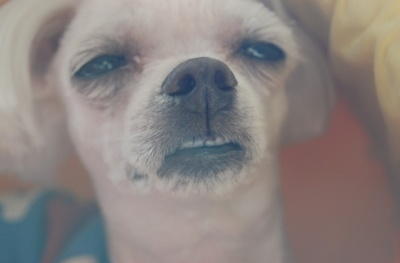

In [9]:
url = 'https://dispatch.cdnser.be/wp-content/uploads/2018/06/20180607225725_f.jpg'
data = urllib.request.urlopen(url).read()
Image.open(BytesIO(data))

In [11]:
#MongoDB로 파일을 업로드할 객체 생성
bucket=GridFSBucket(db)
p_bucket = bucket
p_bucket

In [12]:
grid_in = bucket.open_upload_stream('result.jpg', metadata = {'contentType':'image/jpg'})
grid_in

In [13]:
grid_in.write(data)
grid_in.close()

In [15]:
image_list = list(db.fs.files.find())
image_list

[{'_id': ObjectId('636088f14a71887f4bf9e17f'),
  'filename': 'test.txt',
  'chunkSize': 261120,
  'length': 57,
  'uploadDate': datetime.datetime(2022, 11, 1, 2, 48, 17, 424000)},
 {'_id': ObjectId('636093ad4be4789ee602dc95'),
  'filename': 'result.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'length': 27110,
  'uploadDate': datetime.datetime(2022, 11, 1, 3, 34, 21, 844000)}]

In [16]:
real_img = Image.open(BytesIO(data))
real_img.show()